In [1]:
%matplotlib inline

# Import statements
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import tensorflow as tf
import zipfile

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
def unzip_data(data_dir, zip_file):
    with zipfile.ZipFile(data_dir + zip_file, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
        
data_dir = './data/digit-recognizer/'
submission_csv = 'submission.csv'
zip_file = 'digit-recognizer.zip'
test_file = 'test.csv'
train_file = 'train.csv'

In [3]:
def clean_data_dir(data_dir):
    shutil.rmtree(data_dir, ignore_errors=True)

In [4]:
def display_image(dataframe, index):
    img = dataframe.drop(columns='label').iloc[index].to_numpy()
    plt.title('Label: ' + str(dataframe['label'][index]))
    plt.imshow(img.reshape((28, 28)))

In [5]:
# Bash command to download MNIST dataset
!kaggle competitions download -c digit-recognizer -p {data_dir}

100%|██████████████████████████████████████| 15.3M/15.3M [00:07<00:00, 2.17MB/s]
100%|██████████████████████████████████████| 15.3M/15.3M [00:07<00:00, 2.12MB/s]


In [6]:
unzip_data(data_dir, zip_file)

In [7]:
# Extract training data
train_path = data_dir + train_file
training_df = pd.read_csv(train_path)

# Extract test data
test_path = data_dir + test_file
test_df = pd.read_csv(test_path)

In [8]:
# Delete data
# clean_data_dir(data_dir)

In [9]:
training_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
training_labels = training_df['label'].to_numpy()
training_labels

array([1, 0, 1, ..., 7, 6, 9])

In [12]:
training_images = training_df.drop(columns='label').to_numpy()
training_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
test_images = test_df.to_numpy()
test_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# Normalize data
max_val = float(max(training_images.flatten()))

training_images = tf.dtypes.cast(training_images, tf.float32) / max_val
test_images = tf.dtypes.cast(test_images, tf.float32) / max_val

In [15]:
max(training_images.numpy().flatten())

1.0

In [16]:
# Constructing the model
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10),
])

# Compile the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

In [17]:
model.fit(training_images, training_labels, batch_size=32, epochs=5, verbose=2)

Epoch 1/5
1313/1313 - 2s - loss: 0.2140 - accuracy: 0.9346
Epoch 2/5
1313/1313 - 2s - loss: 0.0888 - accuracy: 0.9718
Epoch 3/5
1313/1313 - 2s - loss: 0.0582 - accuracy: 0.9817
Epoch 4/5
1313/1313 - 2s - loss: 0.0434 - accuracy: 0.9863
Epoch 5/5
1313/1313 - 2s - loss: 0.0361 - accuracy: 0.9883


In [18]:
results = model.predict(test_images, batch_size=32, verbose=2)
results

875/875 - 1s


array([[ -5.358611  ,  -5.8363876 ,  17.925116  , ...,   1.7858267 ,
         -1.9116687 ,  -3.3930492 ],
       [ 19.502962  , -15.486336  ,  -5.4016805 , ...,  -4.1298437 ,
         -9.988662  ,  -4.99002   ],
       [ -7.003109  ,  -5.125021  ,  -5.8212824 , ...,  -1.9355769 ,
          1.6761653 ,  11.741432  ],
       ...,
       [-14.547285  ,  -8.913328  ,  -7.9931097 , ...,  -7.0367126 ,
          3.2283323 ,  -0.6981832 ],
       [ -4.652723  ,  -6.2612906 ,  -5.415533  , ...,   0.51205534,
         -5.799824  ,  16.224209  ],
       [ -8.688413  ,  -6.3355446 ,  16.446503  , ...,  -1.7084844 ,
         -4.1451154 ,  -4.0015707 ]], dtype=float32)

In [19]:
print(type(results))
results.shape

<class 'numpy.ndarray'>


(28000, 10)

In [20]:
results[0]

array([ -5.358611 ,  -5.8363876,  17.925116 ,  -3.2074552,  -8.016664 ,
       -11.663361 ,  -7.419202 ,   1.7858267,  -1.9116687,  -3.3930492],
      dtype=float32)

In [21]:
predictions = np.argmax(results, axis=1)
print(predictions)

[2 0 9 ... 3 9 2]


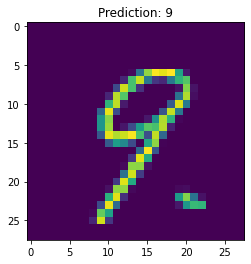

In [24]:
index = 2
img = test_df.iloc[index].to_numpy()
plt.title('Prediction: ' + str(predictions[index]))
plt.imshow(img.reshape((28, 28)))

In [25]:
with open(data_dir + submission_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['ImageId', 'Label'])
    for image_id, image_label in zip(range(1, len(predictions) + 1), predictions):
        writer.writerow([image_id, image_label])

In [27]:
# Submit
#!kaggle competitions submit -f {data_dir + submission_csv} -m "First submission" digit-recognizer

100%|█████████████████████████████████████████| 235k/235k [00:00<00:00, 307kB/s]
Successfully submitted to Digit Recognizer

In [28]:
clean_data_dir(data_dir)